Saving API_SP.POP.TOTL_DS2_en_csv_v2_130083.csv to API_SP.POP.TOTL_DS2_en_csv_v2_130083 (1).csv


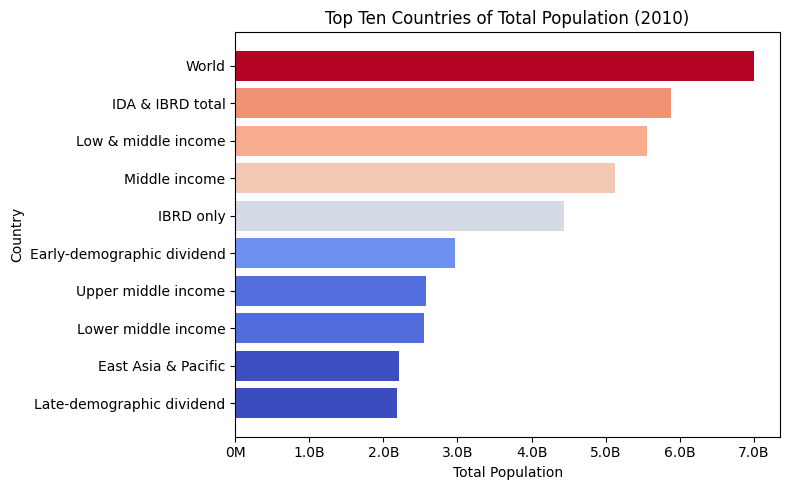

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import matplotlib.cm as cm
from google.colab import files
import io

uploaded = files.upload()

if uploaded:
    POPULATION_FILE_NAME = next(iter(uploaded))
    POPULATION_FILE = io.BytesIO(uploaded[POPULATION_FILE_NAME])
else:
    raise SystemExit("Error: Required data file not found.")

LATEST_YEAR = '2024'

def millions_formatter(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    return f'{x/1e6:.0f}M'

pop_df = (
    pd.read_csv(POPULATION_FILE, skiprows=4)
    .drop(columns=['Unnamed: 69'], errors='ignore')
)

year_cols = [col for col in pop_df.columns if col.isdigit() and int(col) >= 2000]

melted_pop_df = pop_df.melt(
    id_vars=['Country Name'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Population'
)

melted_pop_df['Population'] = pd.to_numeric(melted_pop_df['Population'], errors='coerce')
melted_pop_df['Year'] = melted_pop_df['Year'].astype(int)

TARGET_YEAR = 2010

top_10_pop_2010 = (
    melted_pop_df[melted_pop_df['Year'] == TARGET_YEAR]
    .sort_values(by='Population', ascending=False)
    .head(10)
    .dropna(subset=['Population'])
)

cmap = cm.coolwarm
norm = plt.Normalize(top_10_pop_2010['Population'].min(), top_10_pop_2010['Population'].max())

plt.figure(figsize=(8, 5))

plt.barh(
    top_10_pop_2010['Country Name'],
    top_10_pop_2010['Population'],
    color=cmap(norm(top_10_pop_2010['Population']))
)

plt.gca().invert_yaxis()

plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.title(f'Top Ten Countries of Total Population ({TARGET_YEAR})')
plt.xlabel('Total Population')
plt.ylabel('Country')

plt.tight_layout()
plt.show()